In [12]:
#Import and Explore
import pandas as pd

df = pd.read_csv("C:\\Users\\shivangi\\Downloads\\Titanic-Dataset.csv")

print(df.head())

print(df.info())

print(df.isnull().sum())

print(df.dtypes)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [13]:
#Handle Missing Values
df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Fare'] = df['Fare'].fillna(df['Fare'].median())

df.dropna(axis=0, inplace=True) 

In [14]:
#Encode Categorical Features
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

df = pd.get_dummies(df, columns=[col for col in ['Sex', 'Embarked'] if col in df.columns], drop_first=True)

if 'Survived' in df.columns:
    df['Survived'] = df['Survived'].astype(int)


In [15]:
#Normalize / Standardize Numerical Features
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

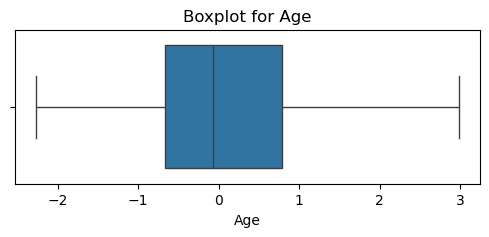

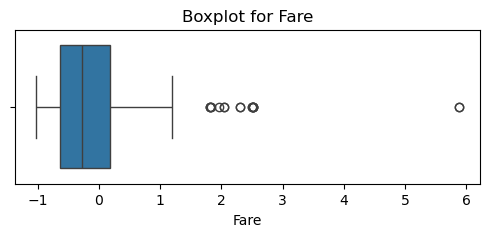

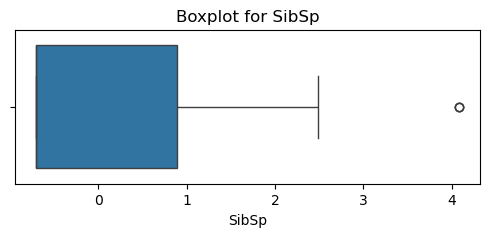

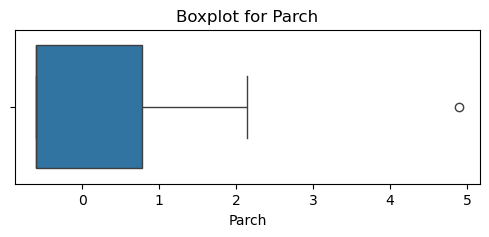

In [16]:
#Visualize and Remove Outliers
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
